# Logistic Regression on Auto MPG Dataset (Binary Classification)
Note: Target 'mpg' is binned into 'High' (>= median) and 'Low' (< median) efficiency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Preprocessing
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna()
df['horsepower'] = df['horsepower'].astype(float)
df = df.drop('car name', axis=1)

# Create Binary Target
median_mpg = df['mpg'].median()
df['mpg_class'] = np.where(df['mpg'] >= median_mpg, 1, 0) # 1 = High Efficiency, 0 = Low Efficiency

X = df.drop(['mpg', 'mpg_class'], axis=1)
y = df['mpg_class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8734177215189873

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.81      0.95      0.88        37

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79


Confusion Matrix:
 [[34  8]
 [ 2 35]]


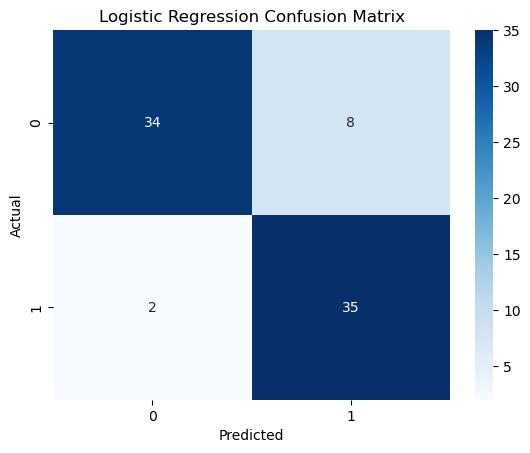

In [4]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()